# Asynchronous Lecture 05

## Atrificial neural networks

### CIS432 Machine Learning for Business Analytics



# Binary Classification

From "Deep Learning with Python" by François Chollet. For additional explanations, see https://github.com/fchollet/deep-learning-with-python-notebooks

Data: 50,000 reviews from [IMDB](https://www.imdb.com/), each labeled a positive or negative.

Goal: predict whether a review is positive or negative.



## Preparing the data

In [ ]:
from tensorflow.keras.datasets import imdb
# load data (a word that is not among the 10000 most frequent words is read as '?')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_data.shape # 25,000 training samples

(25000,)

In [ ]:
test_data.shape # 25,000 test samples

(25000,)

In [ ]:
# each review is represented as a list of integer. Each integer corresponds to a word.
print( train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# mapping between words to indexes
word_index = imdb.get_word_index()
word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
# the most frequent word
word_index['the']

1

In [ ]:
word_index['a']

3

In [ ]:
# quite common
word_index['boy']

427

In [ ]:
# not among the top 10,000 words (will not appear in train_data or test_data. instead will be encoded as 2 ('unknown'))
word_index['encyclopedia']

20668

In [ ]:
# a total of 88,584 different words are used in the reviews
len(word_index)

88584

In [ ]:
# reverse mapping between indexes to words
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# decode the first sample (review)
# the values 0,1,2 are reserved for 'padding', 'start of sequence', and 'unknown'
# print '?' instead of 0,1,2 (d.get(index,'?') returns '?' if there is no value associated with the index)
[reverse_word_index.get(word-3,'?') for word in train_data[0]]

['?',
 'this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 '?',
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 '?',
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 '?',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',
 'end',
 'it',

In [ ]:
# labels: 0 (negative review) and 1 (positive review)
# in this case, the review is positive
train_labels[0]

1

### Transform list of lists to a binary matrix

For example, the list \[3,5\] becomes \[0,0,0,1,0,1,...\]

Did we lose anything in this representation?


In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1.
    return(results)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_labels.dtype

dtype('int64')

In [ ]:
# convert labels from integers to floating point numbers (our model predicts probabilities (floating point numbers), which we will compare against the labels below)
y_train = train_labels.astype('float32')
y_test = test_labels.astype('float32')

### Creating a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Building the network

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential() # layered models; for general DAGs use functional
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compiling the model

Configuring the optimization method, loss function, and metrics that will be displayed throughout the training process

In [ ]:
model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Training the model

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.6840 - loss: 0.6027 - val_acc: 0.8502 - val_loss: 0.4034
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.8866 - loss: 0.3451 - val_acc: 0.8709 - val_loss: 0.3322
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - acc: 0.9228 - loss: 0.2437 - val_acc: 0.8894 - val_loss: 0.2836
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.9406 - loss: 0.1932 - val_acc: 0.8837 - val_loss: 0.2859
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - acc: 0.9495 - loss: 0.1581 - val_acc: 0.8893 - val_loss: 0.2772
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.9574 - loss: 0.1362 - val_acc: 0.8863 - val_loss: 0.2851
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - acc: 0.9634 - loss: 0.1210 - val_acc: 0.8842 - val_loss: 0.2970
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 0.9737 - loss: 0.0981 - val_acc: 0.8843 - val_loss: 0.3130
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - acc: 0.9776

In [ ]:
type(history)

keras.src.callbacks.history.History

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

In [ ]:
history_dict['acc']

[0.772266685962677,
 0.8937333226203918,
 0.9199333190917969,
 0.9354000091552734,
 0.9470000267028809,
 0.9562666416168213,
 0.962933361530304,
 0.9703333377838135,
 0.9739333391189575,
 0.979200005531311,
 0.9831333160400391,
 0.9850666522979736,
 0.987666666507721,
 0.9920666813850403,
 0.9933333396911621,
 0.995199978351593,
 0.9959999918937683,
 0.996999979019165,
 0.9975333213806152,
 0.9977999925613403]

### Plot the training and validation loss and accuracy

In [ ]:
import matplotlib.pyplot as plt

def plot_history(h):
    history_dict = h.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1,len(loss_values)+1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']
    plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

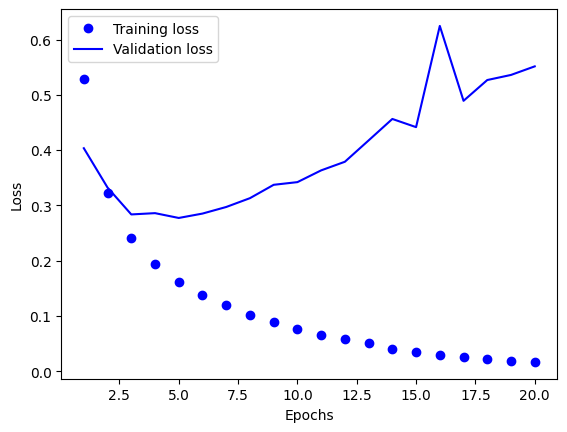

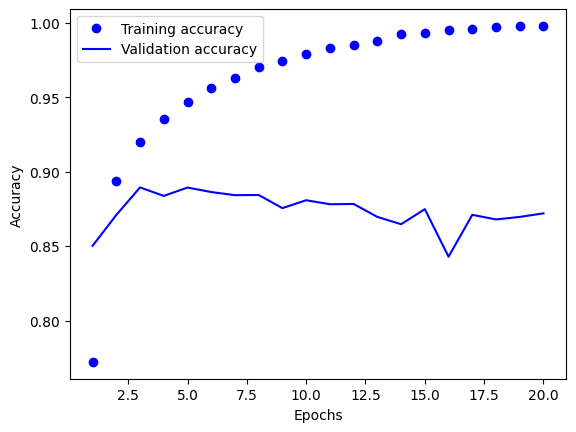

In [ ]:
plot_history(history)

# Retrain a model from scratch
* Use both training and validation data
* Set the number of iteration according to the validation data

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train,epochs = 4, batch_size = 32) # train on the entire training data (inc. validation)

Epoch 1/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8251 - loss: 0.4062
Epoch 2/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.9228 - loss: 0.2071
Epoch 3/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9385 - loss: 0.1696
Epoch 4/4
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.9479 - loss: 0.1454


In [ ]:
# Clear some memory
import gc
gc.collect()
x_train, y_train = None, None

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=1)

25000/25000 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - acc: 0.8714 - loss: 0.3371


In [ ]:
results

[0.33310621976852417, 0.8733199834823608]

# Use trained model to generate predictions on new data

In [ ]:
# Clear some memory
gc.collect()

346

In [ ]:
# predict labels of the test data
y_pred = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
# first 5 predictions (probabilities)
y_pred[:5]

array([[0.07576029],
       [0.99998426],
       [0.92959964],
       [0.9332355 ],
       [0.9759466 ]], dtype=float32)

Predictions close to 1 - high probability for positive review

Predictions close to 0 - high probability for a negative review

In [ ]:
# first 5 predictions (labels)
(y_pred>0.5)

array([[False],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# true labels
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [ ]:
# manually compute accuracy (test data)
np.mean((y_pred>0.5).reshape(-1)==y_test)

0.87332

In [ ]:
# manually compute the logistic loss (test data)
loss = 0
for i in range(x_test.shape[0]):
    if y_test[i]==1:
        loss -= np.log(y_pred[i])
    else:
        loss -= np.log(1-y_pred[i])
print(loss/x_test.shape[0])

[0.33310625]


In [ ]:
# manually compute the logistic loss
from sklearn.metrics import log_loss
y_pred_both = np.concatenate([1-y_pred, y_pred], axis =1)
log_loss(y_test, y_pred_both)

0.3331074239830923

# Further experiments
* Different number of hidden layers: 1,3
* Different number of hidden units: 32, 64
* Different loss functions: 'mse'
* Different activation functions: 'tanh', 'sigmoid'

In [ ]:
# CLear some memory
gc.collect()
x_test, y_test = None, None

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - acc: 0.8086 - loss: 0.4365 - val_acc: 0.8864 - val_loss: 0.2836
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - acc: 0.9262 - loss: 0.1991 - val_acc: 0.8877 - val_loss: 0.2900
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9476 - loss: 0.1474 - val_acc: 0.8835 - val_loss: 0.3160
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9593 - loss: 0.1149 - val_acc: 0.8804 - val_loss: 0.3442
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.9687 - loss: 0.0874 - val_acc: 0.8790 - val_loss: 0.3845
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - acc: 0.9785 - loss: 0.0659 - val_acc: 0.8774 - val_loss: 0.4500
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9830 - loss: 0.0517 - val_acc: 0.8727 - val_loss: 0.5081
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - acc: 0.9871 - loss: 0.0374 - val_acc: 0.8723 - val_loss: 0.5946
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - ac

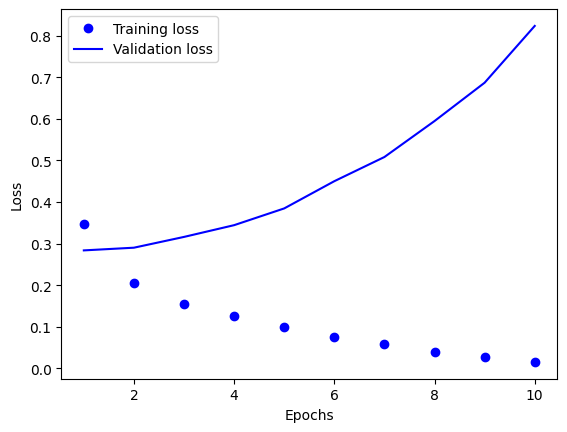

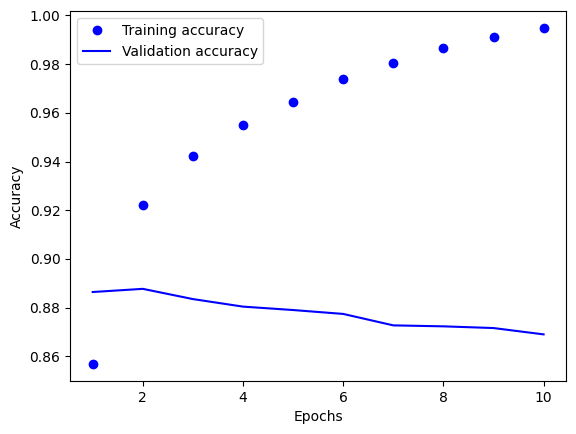

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile( optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_data = (x_val, y_val))
plot_history(history)

# Key points
* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it--as tensors--into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.
* Stacks of _Dense_ layers with _relu_ activations can solve a wide range of problems (including sentiment classification), and you'll likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a _Dense_ layer with one unit and a _sigmoid_ activation: the output of your network should be a scalar between 0 and 1, encoding probability.
* With such a scalar sigmoid output on a binary classification problem, the loss function you should is is _binary\crossentropy_.
* The _rmsprop_ optimizer is generally a good enough choice, whatever your problem. That's one less thing for you to worry about.
* As they get better on their training data, neural netwroks eventually start over-fitting and end up obtaining increasingly worse results on data they've never seen before. Be sure to always monitor performance on data that is outside of the training set.